## Метод Годунова для уравнения Бюргерса

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def df_burgers(u):
    """The derivative of the flux function, here defined for Burger's equation."""

    return uо

In [3]:
def plot_characteristics(df, ul, ur):
    """Plot the characteristic lines for the initial data of a scalar Riemann problem."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-', lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = df(ul)
    slope_r = df(ur)
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        
    x_fill = [x_end_points_l[-1], x_start_points_l[-1], x_end_points_r[0]]
    t_fill = [1.0, 0.0, 1.0]
    ax2.fill_between(x_fill, t_fill, 1.0, facecolor = 'red', alpha = 0.5)
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

NameError: name 'uо' is not defined

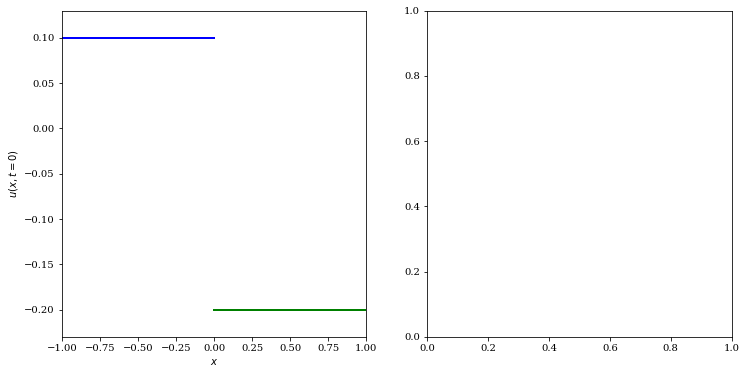

In [4]:
plot_characteristics(df_burgers, 0.1, -0.2)

In [ ]:
plot_characteristics(df_burgers, -0.1, 0.2)

interactive(children=(FloatSlider(value=0.1, description='ul', max=2.0, min=-2.0), FloatSlider(value=-0.2, des…

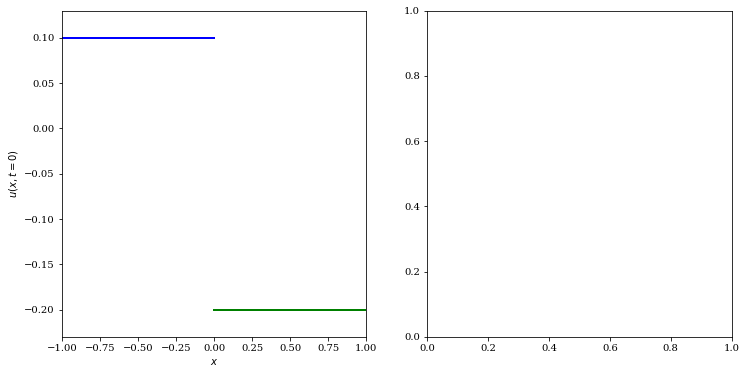

In [5]:
from ipywidgets import interactive, FloatSlider
def interactive_characteristics(ul, ur):
    return plot_characteristics(df_burgers, ul, ur)
interactive(interactive_characteristics, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

In [6]:
def plot_shock_burgers(ul, ur):
    """Plot the characteristic lines for the shock solution to Burger's equation."""
    
    assert(ul > ur)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    s = 0.5 * (ur + ul)
    ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    t_end_points_l = np.ones_like(x_start_points_l)
    t_end_points_r = np.ones_like(x_start_points_r)
    
    # Look for intersections
    t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
    t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
    x_end_points_l = x_start_points_l + slope_l * t_end_points_l
    x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
    for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
        ax2.plot([xs, xe], [0.0, te], 'b-')
    for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
        ax2.plot([xs, xe], [0.0, te], 'g-')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

In [7]:
interactive(plot_shock_burgers, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

interactive(children=(FloatSlider(value=0.1, description='ul', max=2.0, min=-2.0), FloatSlider(value=-0.2, des…

In [15]:
def nonlinearconv(nx):
    """Solve the linear convection equation.
    
    Solves the equation d_t u + d_x F = 0 where 
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t computed using the CFL 0.5
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    None : none
    """
    dx = 2/(nx-1)
    nt = 1000
    x = np.linspace(0,2,nx)
    
    dt = 0.5*dx
    un = np.ones(nx)
    u = np.ones(nx) 
    u[np.intersect1d(np.where(x >= 0.5), np.where(x <= 1))]=2 

    for n in range(nt):  
        un = u.copy()
        for i in range(1, len(x)-1):
            
            s = 1/2*(un[i+1]+un[i])
            
            if (un[i] >= un[i+1]): #скачок
                if (s >= 0):
                    u[i] = un[i] -dt/dx*(un[i]**2 - un[i-1]**2)/2
                else:
                    u[i] = un[i] -dt/dx*(un[i+1]**2 - un[i]**2)/2
            elif (un[i] < un[i+1]): #волна разряжения
                if (un[i] > 0):
                    u[i] = un[i] -dt/dx*(un[i]**2 - un[i-1]**2)/2
                if (un[i+1] < 0):
                    u[i] = un[i] -dt/dx*(un[i+1]**2 - un[i]**2)/2
        u[0] = u[-1] = 1.0
        
    plt.plot(x, u, color='#003366', ls='--', lw=3)
    plt.ylim(0,2.5);

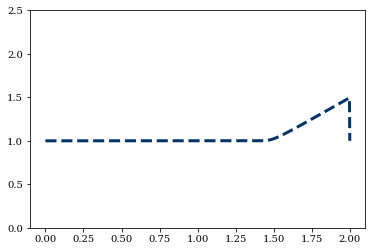

In [16]:
nonlinearconv(1000)